#Ejercicio complementario Arranque en frío

Instalación de paqueterías no incluidas en Google colab


In [ ]:
pip install opendatasets


In [ ]:
pip install fuzzywuzzy

Importar las librerías necesarias

In [ ]:
import opendatasets as od
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

Descargar el dataset


In [ ]:
od.download(
	"https://www.kaggle.com/datasets/andrewmvd/spotify-playlists")

Skipping, found downloaded files in "./spotify-playlists" (use force=True to force download)


Lectura del dataset y eliminación de observaciones no utiles

In [ ]:
#leer el dataset
df = pd.read_csv("spotify-playlists//spotify_dataset.csv",on_bad_lines='skip')

#Renombrar las columnas
df.columns = ['user', 'artist', 'song', 'playlist']

#Eliminar todos aquellos valores NA
df.dropna(inplace=True)

#Eliminar todos los valores duplicados
df.drop_duplicates(inplace=True)

#Eliminar las observaciones que presenten los siguientes valores en la columna de playlist
#Estas observaciones se eliminan porque no son playlist publicas
df.drop(df[df['playlist']=='Starred'].index,inplace=True)
df.drop(df[df['playlist']=='Liked from Radio'].index,inplace=True)
df.drop(df[df['playlist']=='Favoritas de la radio'].index,inplace=True)
df.drop(df[df['playlist']=='New Playlist'].index,inplace=True)
df.drop(df[df['playlist']=='My Shazam Tracks'].index,inplace=True)
df.drop(df[df['playlist']=='All Live Files'].index,inplace=True)
df.drop(df[df['playlist']=='iPhone'].index,inplace=True)


#obtener un Id para cad usuario
user_id = {}
cnt = 1
for user in df['user']:
    if user not in user_id:
        user_id[user] = cnt
        cnt+=1

#Obtener el conteo de las playlist
playlists = {}
for playlist in df['playlist']:
    if playlist in playlists:
      playlists[playlist] += 1
    else:
      playlists[playlist] = 1

Generación de columnas útiles

In [ ]:
#Anadir la dataset las columnas de ID y de reporducciones por playlist
df['User_id'] = df['user'].apply(lambda use: user_id[use])
df['Repros'] = df['playlist'].apply(lambda playlist: playlists[playlist])



In [ ]:
df.head()

,user,artist,song,playlist,User_id,Repros
0,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,(The Angels Wanna Wear My) Red Shoes,HARD ROCK 2010,1,67
1,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,"(What's So Funny 'Bout) Peace, Love And Unders...",HARD ROCK 2010,1,67
2,9cc0cfd4d7d7885102480dd99e7a90d6,Tiffany Page,7 Years Too Late,HARD ROCK 2010,1,67
3,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,Accidents Will Happen,HARD ROCK 2010,1,67
4,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,Alison,HARD ROCK 2010,1,67


Generar dataset con el número de reproducciones que tiene playlist

In [ ]:
#Generar un dataset que solamente contenga el titulo de playlist y su numero de reproducciones
playlist_df = pd.DataFrame.from_dict(playlists,orient='index')
playlist_df.columns = ['Repros']
playlist_df.reset_index(inplace = True)
playlist_df.columns = ['Playlist','Repros']
playlist_df.sort_values(by='Repros',ascending=False,inplace=True)
playlist_df.reset_index(inplace = True,drop=True)

In [ ]:
print(f'Existen {len(playlist_df)} playlists')

Existen 157313 playlists


Obtención del top 20 playlist con más reproducciones

<ipython-input-10-b488ca9cfa02>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Playlist', y='Repros', data=playlist_df.loc[0:20], palette='rocket')


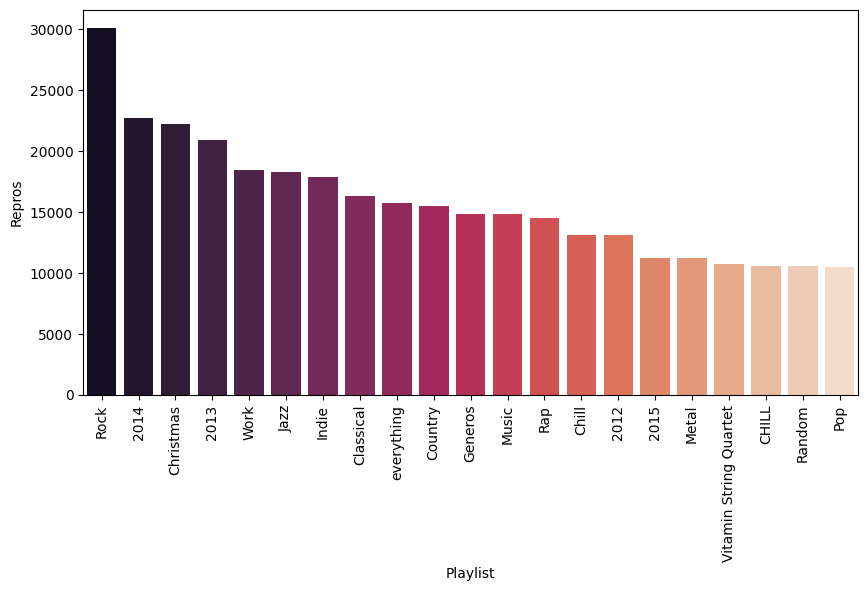

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='Playlist', y='Repros', data=playlist_df.loc[0:20], palette='rocket')
plt.xticks(rotation=90)
plt.show()

Obtener solamente las 20 playlist con mas reproducciones en el dataset


In [ ]:
toMatain = playlist_df.loc[:20]
del playlist_df

In [ ]:
toMatain

,Playlist,Repros
0,Rock,30107
1,2014,22674
2,Christmas,22236
3,2013,20870
4,Work,18408
5,Jazz,18266
6,Indie,17858
7,Classical,16328
8,everything,15705
9,Country,15503


Eliminar todas aquellas observaciones que no posean alguna playlist de las mostradas anteriormente.

In [ ]:
df = df[df['playlist'].isin(toMatain['Playlist'])]

Realizar el mismo proceso que se lleve a cabo con las playlist, pero ahora con los artistas.

In [ ]:
#Obtener las reproducciones por artista
ReprosArtistas = {}
for artist in df['artist']:
  if artist in ReprosArtistas:
    ReprosArtistas[artist]+=1
  else:
    ReprosArtistas[artist]=1

In [ ]:
artists_df = pd.DataFrame.from_dict(ReprosArtistas,orient='index')

In [ ]:
artists_df.reset_index(inplace=True)
artists_df.columns = ['artist','repros']
artists_df.sort_values(by='repros',ascending=False,inplace=True)
artists_df.reset_index(inplace=True)

toMatain = artists_df.loc[:20]
df = df[df['artist'].isin(toMatain['artist'])]

In [ ]:
df.reset_index(inplace=True,drop=True)
df

,user,artist,song,playlist,User_id,Repros
0,50346e4190d1707ebc6b39a95f86927a,Miles Davis,Basin Street Blues,Jazz,14,18266
1,50346e4190d1707ebc6b39a95f86927a,Miles Davis,I Fall in Love Too Easily,Jazz,14,18266
2,50346e4190d1707ebc6b39a95f86927a,Miles Davis,My Funny Valentine,Jazz,14,18266
3,23a17802002bcd5ce26954efcbed2676,Johann Sebastian Bach,"Cello Suite No. 1 in G Major, BWV 1007: Prelude",Classical,30,16328
4,23a17802002bcd5ce26954efcbed2676,Wolfgang Amadeus Mozart,"Die Zauberflöte (The Magic Flute), K. 620, Act...",Classical,30,16328
...,...,...,...,...,...,...
28583,bf7fd0e14a76a1945d1bd0cce485fd26,Miles Davis,Water on the Pond,Jazz,15066,18266
28584,bf7fd0e14a76a1945d1bd0cce485fd26,Miles Davis,Weirdo,Jazz,15066,18266
28585,bf7fd0e14a76a1945d1bd0cce485fd26,Miles Davis,When Lights Are Low,Jazz,15066,18266
28586,bf7fd0e14a76a1945d1bd0cce485fd26,Miles Davis,Woody 'N You - Live Version,Jazz,15066,18266


Obtener las matrices dummy tanto de las playlist como de los artistas

In [ ]:
#Matriz dummy de las playlist
dummyPlaylist = pd.get_dummies(df['playlist'],sparse=True)
dummyPlaylist

,2012,2013,2014,2015,CHILL,Chill,Christmas,Classical,Country,Generos,...,Jazz,Metal,Music,Pop,Random,Rap,Rock,Vitamin String Quartet,Work,everything
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28583,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
28584,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
28585,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
28586,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [ ]:
#Matriz dummy de los artistas
dummyArtirst = pd.get_dummies(df['artist'],sparse=True)
dummyArtirst

,Brad Paisley,Bruce Springsteen,Ella Fitzgerald,Eminem,Frank Sinatra,Glee Cast,Johann Sebastian Bach,Johnny Hallyday,Kylie Minogue,Led Zeppelin,...,Metallica,Michael Bublé,Miles Davis,Peggy Lee,Queen,Snoop Dogg,Sufjan Stevens,Vitamin String Quartet,Wolfgang Amadeus Mozart,Zac Brown Band
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28583,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
28584,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
28585,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
28586,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
#Matriz dummy total
dummy = pd.concat([dummyPlaylist,dummyArtirst],axis=1)
del dummyArtirst
del dummyPlaylist


In [ ]:
dummy

,2012,2013,2014,2015,CHILL,Chill,Christmas,Classical,Country,Generos,...,Metallica,Michael Bublé,Miles Davis,Peggy Lee,Queen,Snoop Dogg,Sufjan Stevens,Vitamin String Quartet,Wolfgang Amadeus Mozart,Zac Brown Band
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28583,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
28584,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
28585,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
28586,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
#Encontrar la matriz de similaridad
cosine_sim = cosine_similarity(dummy, dummy)
print(f"Las dimensiones de similaridad coseno de las caracteristicas de nuestra matriz de similitud son: {cosine_sim.shape}")

Las dimensiones de similaridad coseno de las caracteristicas de nuestra matriz de similitud son: (28588, 28588)


In [ ]:
from fuzzywuzzy import process

song_idx = dict(zip(df['song'], list(df.index)))
def encuentra_cancion(title):
    all_titles = df['song'].tolist()
    closest_match = process.extractOne(title,all_titles)
    return closest_match[0]

def obtener_recomendaciones_basadas_contenido(title_string, numero_recomendaciones=10):
    title = encuentra_cancion(title_string)
    idx = song_idx[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:(numero_recomendaciones+1)]
    similar_movies = [i[0] for i in sim_scores]
    print(f"Las peliculas recomendadas con base en la pelicula {title} son:")
    print(df['song'].iloc[similar_movies])

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
obtener_recomendaciones_basadas_contenido('Basin Street Blues',10)

Las peliculas recomendadas con base en la pelicula Basin Street Blues son:
1                       I Fall in Love Too Easily
2                              My Funny Valentine
576                                     All Blues
582                                 Blue in Green
587                             Flamenco Sketches
588                            Freddie Freeloader
618                                       So What
814                                        Enigma
815                                          Feio
820    It Never Entered My Mind (Higher & Higher)
Name: song, dtype: object
